In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

## Plot the entire csv file - good non-defect file

In [33]:
good_file_name = 'slownslowp_3V_5'

good_file_directory = 'D:\Final Year Project\Incremental Linear Regression\dataset\sine 250 mv\\train'
good_file_path = '{}\{}.csv'.format(good_file_directory, good_file_name)

In [34]:
good_file_path

'D:\\Final Year Project\\Incremental Linear Regression\\dataset\\sine 250 mv\\train\\slownslowp_3V_5.csv'

In [35]:
good_df = pd.read_csv(good_file_path, usecols=['vdd', 'pd', 'xpd', 'vinp', 'temperature', 'vinn'])

In [36]:
good_file_name = 'slownslowp_3V_5'

good_file_directory = 'D:\Final Year Project\Incremental Linear Regression\dataset\sine 250 mv\\train'
good_file_path = '{}\{}.csv'.format(good_file_directory, good_file_name)
good_df = pd.read_csv(good_file_path, usecols=['vdd', 'pd', 'xpd', 'vinp', 'temperature', 'vinn'])

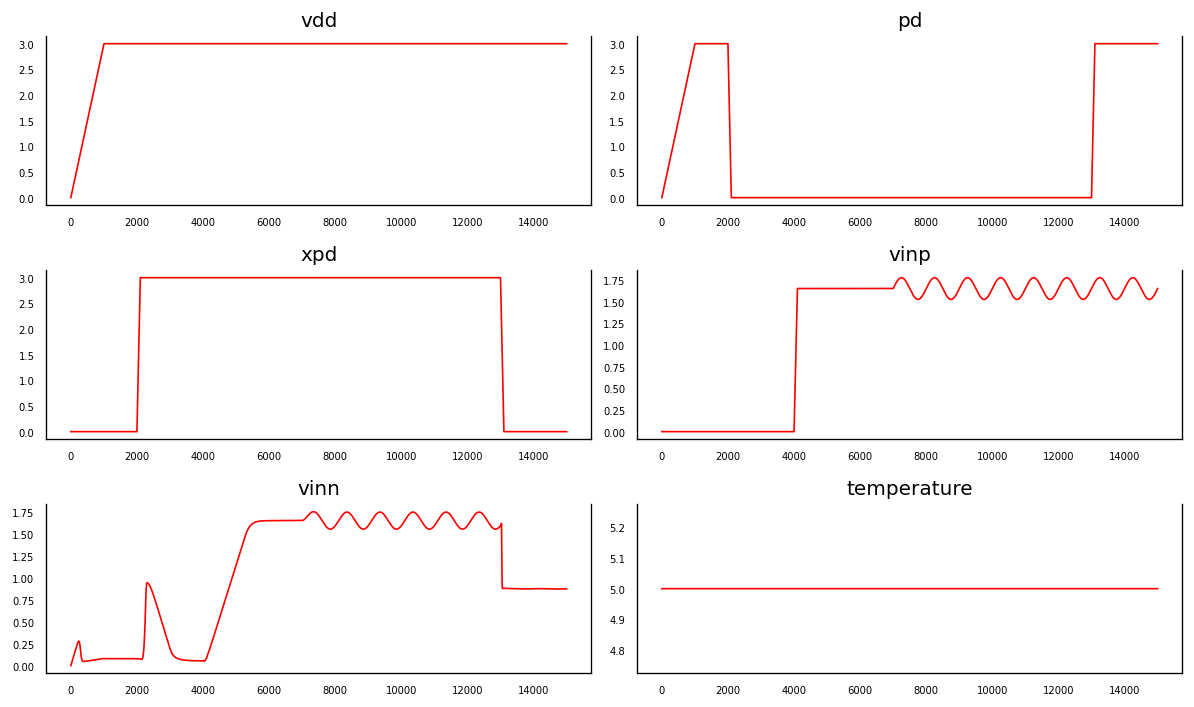

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))

for i, ax in enumerate(axes.flatten()):
    data = good_df[good_df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    
    # Decorations
    ax.set_title(good_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

## Plot the entire csv file - defect

In [38]:
file_name = '1.Defect_sine_inp_40per_reduc_WMNM12_ss_3.0V_-55deg_uniform_sampling.csv'

file_directory = 'D:\Final Year Project\Split Defect\dataset'
file_path = '{}\{}.csv'.format(file_directory, file_name)

In [39]:
file_path

'D:\\Final Year Project\\Split Defect\\dataset\\1.Defect_sine_inp_40per_reduc_WMNM12_ss_3.0V_-55deg_uniform_sampling.csv.csv'

In [40]:
df = pd.read_csv(file_path, usecols=['vdd', 'pd', 'xpd', 'vinp', 'temperature', 'vinn'])

In [41]:
df.head()

,temperature,vdd,pd,xpd,vinp,vinn
0,-55,0.000,0.000,0.0,0.0,0.000000
1,-55,0.003,0.003,0.0,0.0,0.001265
2,-55,0.006,0.006,0.0,0.0,0.002531
3,-55,0.009,0.009,0.0,0.0,0.003795
4,-55,0.012,0.012,0.0,0.0,0.005059


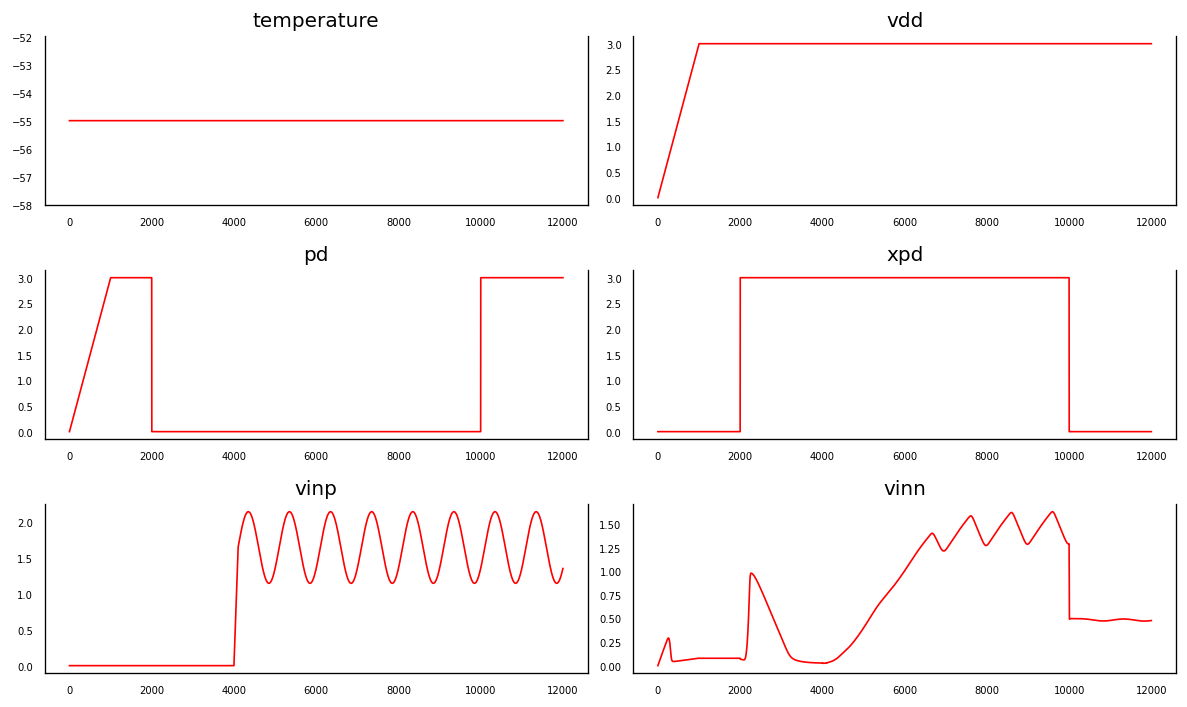

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))

for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

## Split the files

In [43]:
def split(file,name,export):
    df_file = pd.read_csv(file)
    #print(df_file.head())
    #------------------------------------
    #Transient1 separation
    #df_file['vinn']= df_file['vinn'].round(decimals=6)
    vinpmax = df_file['xpd'].max()

    cutoff = 1.65

    l = df_file.vinp[df_file.vinp>cutoff].index.tolist()
    df_transient1 = df_file[0:l[1]]
    #csvname = export+"transient1/"+name+".csv"
    #df_transient1.to_csv(csvname)

    #--------------peak1 within transient1
    r1 = df_transient1.xpd[df_transient1.xpd==0].index.tolist()
    df_rise1 = df_file[0:r1[-1]+1]
    csvname = export+"rise1/"+name+".csv"
    df_rise1.to_csv(csvname)
    print(len(df_rise1))
    #---------------------------------------

    #-------------peak2 within Transient1
    r2 = df_transient1.vinp[df_transient1.vinp>0].index.tolist()
    df_rise2 = df_file[r1[-1]:r2[0]+1]
    csvname = export+"rise2/"+name+".csv"
    df_rise2.to_csv(csvname)
    print(len(df_rise2))
    #--------------------------------------

    #-----------rise3
    df_rise3 = df_file[r2[0]:l[1]]
    csvname = export+"rise3/"+name+".csv"
    df_rise3.to_csv(csvname)
    print(len(df_rise3))

    #-------------------------
    #Functional region split
    df_rest = df_file[l[1]:]
    xpd0list = df_rest.pd[df_rest.pd != 0].index.tolist()
    m = xpd0list[0]-1
    df_functional = df_file[l[1]:m]
    csvname = export+"functional/"+name+".csv"
    df_functional.to_csv(csvname)
    print(len(df_functional))
    #---------------------------------------
    
    #Transient2
    df_t2 = df_file[m+1:]
    print(len(df_t2))
    csvname = export+"fall/"+name+".csv"
    df_t2.to_csv(csvname)

In [44]:
path = "D:\Final Year Project\Split Defect\dataset\*.csv"
lpath = len(path)-5
list_files = []
count =0
export = "D:\Final Year Project\Split Defect\defect\\"

for file in glob.glob(path):
    count = count+1
    print ("\nFile ", count)
    print ("---------------")
    
    name = file[lpath:]
    name = name[:-8]
    
    print ("name = ", name)
    
    split(file, name, export)


File  1
---------------
name =  1.Defect_sine_inp_40per_reduc_WMNM12_ss_3.0V_-55deg_uniform_sampling
2000
2002
101
5898
2001

File  2
---------------
name =  2.Defect_sine_inp_40per_inc_WMNM11_ss_3.0V_-55deg_uniform_sampling
2000
2002
101
5898
2001

File  3
---------------
name =  3.Defect_sine_inp_40per_inc_WMNM11_ss_3.0V_-35deg_uniform_sampling
2000
2002
101
5898
2001

File  4
---------------
name =  4.Defect_sine_inp_90per_inc_LMPD11_ss_3.0V_-55deg_uniform_sampling
2000
2002
101
5898
2001

File  5
---------------
name =  5.Defect_sine_inp_90per_reduc_WMPD12_fs_3.0V_-35deg_uniform_sampling
2000
2002
101
5898
2001


## Plot and see the seperate regions

rise1
rise2
rise3
functional
fall


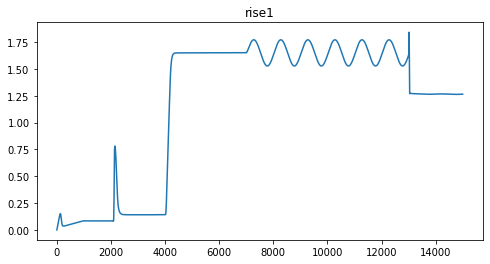

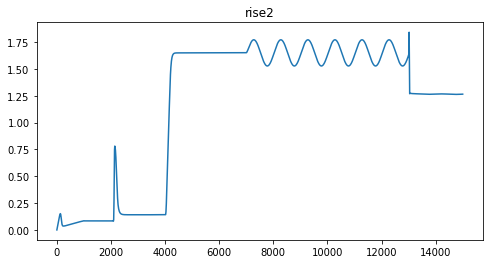

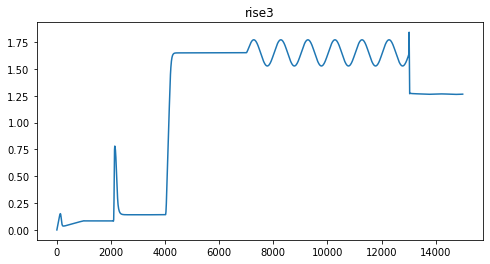

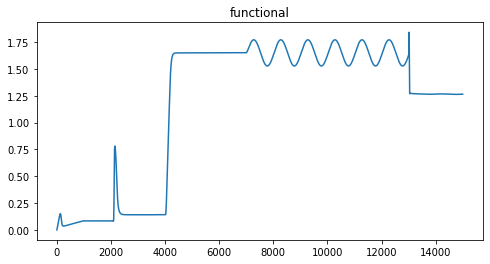

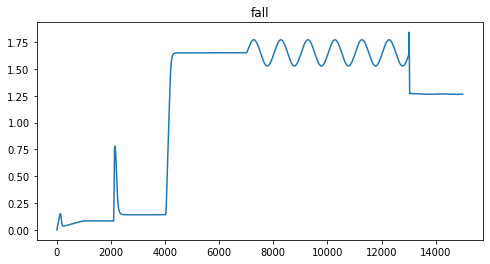

In [15]:
export = "D:\Final Year Project\Split Defect\defect"

good_file_name = 'fastnfastp_3.3V_5.csv'
good_file_directory = 'D:\Final Year Project\Incremental Linear Regression\dataset\sine 250 mv\\train'
good_file_path = '{}\{}.csv'.format(good_file_directory, good_file_name)

for region in (['rise1', 'rise2', 'rise3', 'functional', 'fall']):
    print(region)
    print('=============')
    
    mypath = good_file_directory + "\\" + good_file_name
    mydf = pd.read_csv(mypath, usecols=['vinn'])
        
    fig = plt.figure(figsize=(8,4), facecolor='w', edgecolor='k')
    plt.plot(mydf['vinn'])
    plt.title(region)

Text(0.5, 1.0, '1.Defect_sine_inp_40per_reduc_WMNM12_ss_3.0V_-55deg_uniform_sampling.csv')

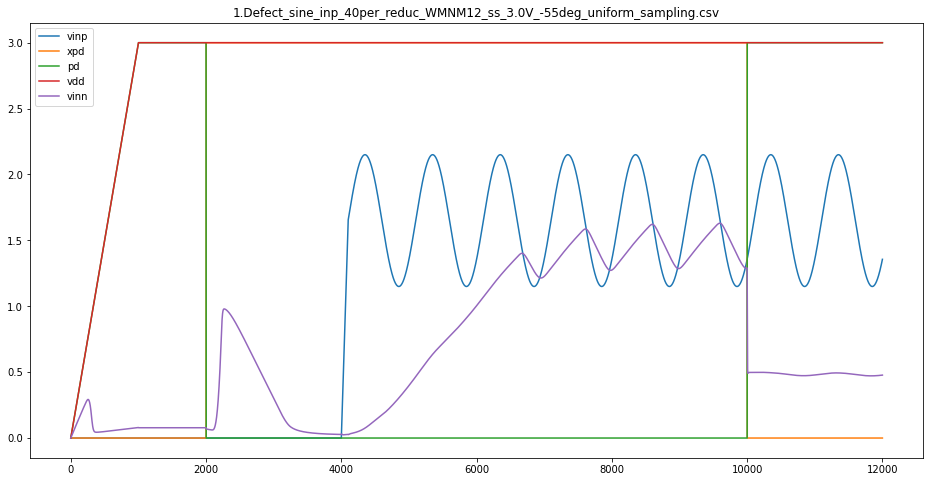

In [16]:
fig = plt.figure(figsize=(16,8), facecolor='w', edgecolor='k')
plt.plot(df[['vinp', 'xpd', 'pd', 'vdd', 'vinn']])
plt.legend(['vinp', 'xpd', 'pd', 'vdd', 'vinn'])
plt.title(file_name)

Text(0.5, 1.0, 'Regions of the waveform')

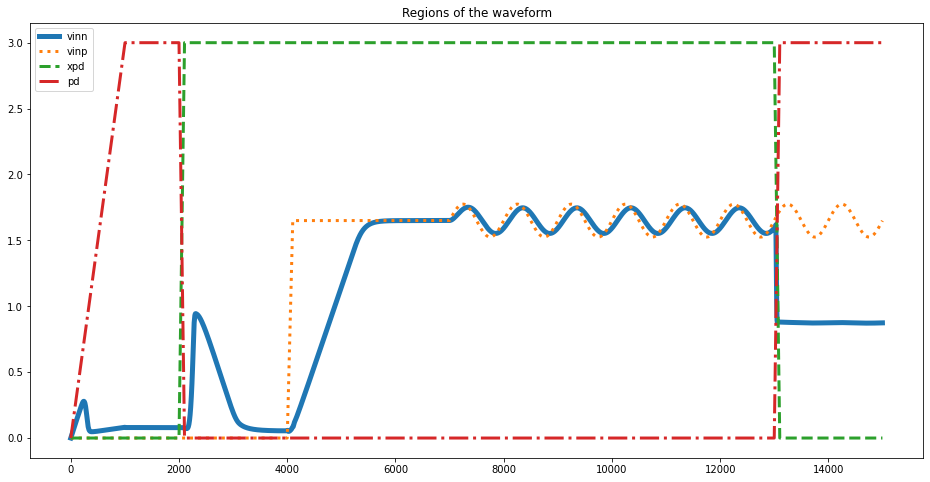

In [31]:
# fig = plt.figure(figsize=(16,8), facecolor='w', edgecolor='k')

# ax  = fig.add_subplot(111)
# ax.plot(df['vinn'], label='y1',linewidth=3.0)
# plt.plot(df[['vinp', 'xpd', 'pd', 'vdd']])

# plt.legend(['vinn', 'vinp', 'xpd', 'pd', 'vdd'])
# plt.title(file_name)

fig = plt.figure(figsize=(16,8), facecolor='w', edgecolor='k')

ax  = fig.add_subplot(111)
ax.plot(good_df['vinn'], label='y1',linewidth=5.0)
# plt.plot(good_df[['vinp', 'xpd', 'pd', 'vdd']],linestyle='dashed')

plt.plot(good_df['vinp'],linestyle='dotted',linewidth=3.0)
plt.plot(good_df['xpd'],linestyle='dashed',linewidth=3.0)
plt.plot(good_df[['pd']],linestyle='dashdot',linewidth=3.0)

plt.legend(['vinn', 'vinp', 'xpd', 'pd'])
plt.title('Regions of the waveform')

# Here

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [45]:
## Split the files

def split(file,name,export):
    df_file = pd.read_csv(file)
    #print(df_file.head())
    #------------------------------------
    #Transient1 separation
    #df_file['vinn']= df_file['vinn'].round(decimals=6)
    vinpmax = df_file['xpd'].max()

    cutoff = 1.65

    l = df_file.vinp[df_file.vinp>cutoff].index.tolist()
    df_transient1 = df_file[0:l[1]]
    #csvname = export+"transient1/"+name+".csv"
    #df_transient1.to_csv(csvname)

    #--------------peak1 within transient1
    r1 = df_transient1.xpd[df_transient1.xpd==0].index.tolist()
    df_rise1 = df_file[0:r1[-1]+1]
    csvname = export+"rise1/"+name+".csv"
    print("LEGEBND = ", csvname)
    df_rise1.to_csv(csvname)
    print(len(df_rise1))
    #---------------------------------------

    #-------------peak2 within Transient1
    r2 = df_transient1.vinp[df_transient1.vinp>0].index.tolist()
    df_rise2 = df_file[r1[-1]:r2[0]+1]
    csvname = export+"rise2/"+name+".csv"
    df_rise2.to_csv(csvname)
    print(len(df_rise2))
    #--------------------------------------

    #-----------rise3
    df_rise3 = df_file[r2[0]:l[1]]
    csvname = export+"rise3/"+name+".csv"
    df_rise3.to_csv(csvname)
    print(len(df_rise3))

    #-------------------------
    #Functional region split
    df_rest = df_file[l[1]:]
    xpd0list = df_rest.pd[df_rest.pd != 0].index.tolist()
    m = xpd0list[0]-1
    df_functional = df_file[l[1]:m]
    csvname = export+"functional/"+name+".csv"
    df_functional.to_csv(csvname)
    print(len(df_functional))
    #---------------------------------------
    
    #Transient2
    df_t2 = df_file[m+1:]
    csvname = export+"fall/"+name+".csv"
    df_t2.to_csv(csvname)
    print(len(df_t2))


In [46]:
path = "D:\\Final Year Project\\Play with DWT\\Sine\\dataset\\sine 750 mv\\test\*.csv"
lpath = len(path)-5
list_files = []
count =0
export = "D:\\Final Year Project\\Split Defect\\normal\\"

for file in glob.glob(path):
    count = count+1
    print ("\nFile ", count)
    print ("---------------")
    
    name = file[lpath:]
    name = name[:-4]
    
    print ("name = ", name)
    
    split(file, name, export)


File  1
---------------
name =  fastnfastp_3.3V_45
LEGEBND =  D:\Final Year Project\Split Defect\normal\rise1/fastnfastp_3.3V_45.csv
2000
2002
3002
5997
2000

File  2
---------------
name =  fastnfastp_3.6V_45
LEGEBND =  D:\Final Year Project\Split Defect\normal\rise1/fastnfastp_3.6V_45.csv
2000
2002
3002
5997
2000

File  3
---------------
name =  fastnslowp_3.3V_45
LEGEBND =  D:\Final Year Project\Split Defect\normal\rise1/fastnslowp_3.3V_45.csv
2000
2002
3002
5997
2000

File  4
---------------
name =  fastnslowp_3.6V_45
LEGEBND =  D:\Final Year Project\Split Defect\normal\rise1/fastnslowp_3.6V_45.csv
2000
2002
3002
5997
2000

File  5
---------------
name =  slownfastp_3.3V_45
LEGEBND =  D:\Final Year Project\Split Defect\normal\rise1/slownfastp_3.3V_45.csv
2000
2002
3002
5997
2000

File  6
---------------
name =  slownfastp_3.6V_45
LEGEBND =  D:\Final Year Project\Split Defect\normal\rise1/slownfastp_3.6V_45.csv
2000
2002
3002
5997
2000

File  7
---------------
name =  slownslowp_3.

In [21]:
def draw_full_waveform(file, export):
    file_name = os.path.basename(file)
    file_name = file_name[:-4]
    temp_df = pd.read_csv(file, usecols=['vdd', 'pd', 'xpd', 'vinp', 'temperature', 'vinn'])
    
    fig = plt.figure(figsize=(16,8), facecolor='w', edgecolor='k')

    ax  = fig.add_subplot(111)
    ax.plot(temp_df['vinn'], label='y1',linewidth=3.0)
    plt.plot(temp_df[['vinp', 'xpd', 'pd', 'vdd']])

    plt.legend(['vinn', 'vinp', 'xpd', 'pd', 'vdd'])
    plt.title(file_name)
    
    
    nm = "{}\\full-waveform.png".format(file_folder)
    print(nm)
    
    plt.savefig(nm)

In [22]:
def draw_full_path(file, export):
    file_name = os.path.basename(file)
    file_name = file_name[:-4]
    temp_df = pd.read_csv(file, usecols=['vdd', 'pd', 'xpd', 'vinp', 'temperature', 'vinn'])
    
    fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6), facecolor='w', edgecolor='k')

    for i, ax in enumerate(axes.flatten()):
        data = temp_df[temp_df.columns[i]]
        ax.plot(data, color='red', linewidth=1)

        # Decorations
        ax.set_title(temp_df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=6)
    
    plt.tight_layout()
    
    nm = "{}\\seperate-plot.png".format(file_folder)
    print(nm)
    
    plt.savefig(nm)

In [23]:
def draw_each_regions(file, export):
    folder_location = "D:\\Final Year Project\\Split Defect\\normal"
    file_name = os.path.basename(file)
#     file_name = file_name[:-4]

    for region in (['rise1', 'rise2', 'rise3', 'functional', 'fall']):
        mypath = folder_location + "\\" + region + "\\" + file_name
        mydf = pd.read_csv(mypath, usecols=['vinn'])

        fig = plt.figure(figsize=(8,4), facecolor='w', edgecolor='k')
        plt.plot(mydf['vinn'])
        plt.title(region)
        
        nm = "{}\\{}.png".format(file_folder, region)
        print(nm)

        plt.savefig(nm)

D:\Final Year Project\Split Defect\waveforms\fastnfastp_3.3\full-waveform.png
D:\Final Year Project\Split Defect\waveforms\fastnfastp_3.3\seperate-plot.png
D:\Final Year Project\Split Defect\waveforms\fastnfastp_3.3\rise1.png
D:\Final Year Project\Split Defect\waveforms\fastnfastp_3.3\rise2.png
D:\Final Year Project\Split Defect\waveforms\fastnfastp_3.3\rise3.png
D:\Final Year Project\Split Defect\waveforms\fastnfastp_3.3\functional.png
D:\Final Year Project\Split Defect\waveforms\fastnfastp_3.3\fall.png
D:\Final Year Project\Split Defect\waveforms\fastnfastp_3.6\full-waveform.png
D:\Final Year Project\Split Defect\waveforms\fastnfastp_3.6\seperate-plot.png
D:\Final Year Project\Split Defect\waveforms\fastnfastp_3.6\rise1.png
D:\Final Year Project\Split Defect\waveforms\fastnfastp_3.6\rise2.png
D:\Final Year Project\Split Defect\waveforms\fastnfastp_3.6\rise3.png
D:\Final Year Project\Split Defect\waveforms\fastnfastp_3.6\functional.png
D:\Final Year Project\Split Defect\waveforms\fast

<ipython-input-23-ff452721e7b4>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,4), facecolor='w', edgecolor='k')


D:\Final Year Project\Split Defect\waveforms\fastnslowp_3.6\full-waveform.png
D:\Final Year Project\Split Defect\waveforms\fastnslowp_3.6\seperate-plot.png
D:\Final Year Project\Split Defect\waveforms\fastnslowp_3.6\rise1.png
D:\Final Year Project\Split Defect\waveforms\fastnslowp_3.6\rise2.png
D:\Final Year Project\Split Defect\waveforms\fastnslowp_3.6\rise3.png
D:\Final Year Project\Split Defect\waveforms\fastnslowp_3.6\functional.png
D:\Final Year Project\Split Defect\waveforms\fastnslowp_3.6\fall.png
D:\Final Year Project\Split Defect\waveforms\slownfastp_3.3\full-waveform.png
D:\Final Year Project\Split Defect\waveforms\slownfastp_3.3\seperate-plot.png
D:\Final Year Project\Split Defect\waveforms\slownfastp_3.3\rise1.png
D:\Final Year Project\Split Defect\waveforms\slownfastp_3.3\rise2.png
D:\Final Year Project\Split Defect\waveforms\slownfastp_3.3\rise3.png
D:\Final Year Project\Split Defect\waveforms\slownfastp_3.3\functional.png
D:\Final Year Project\Split Defect\waveforms\slow

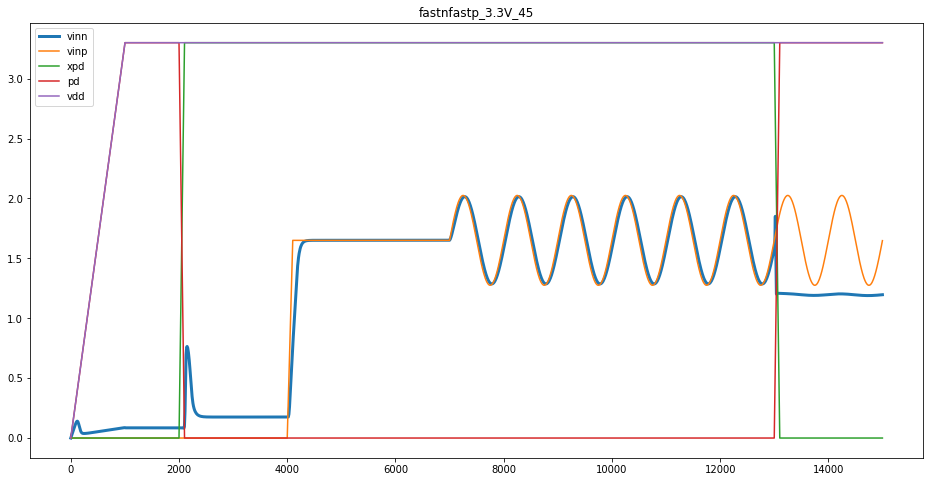

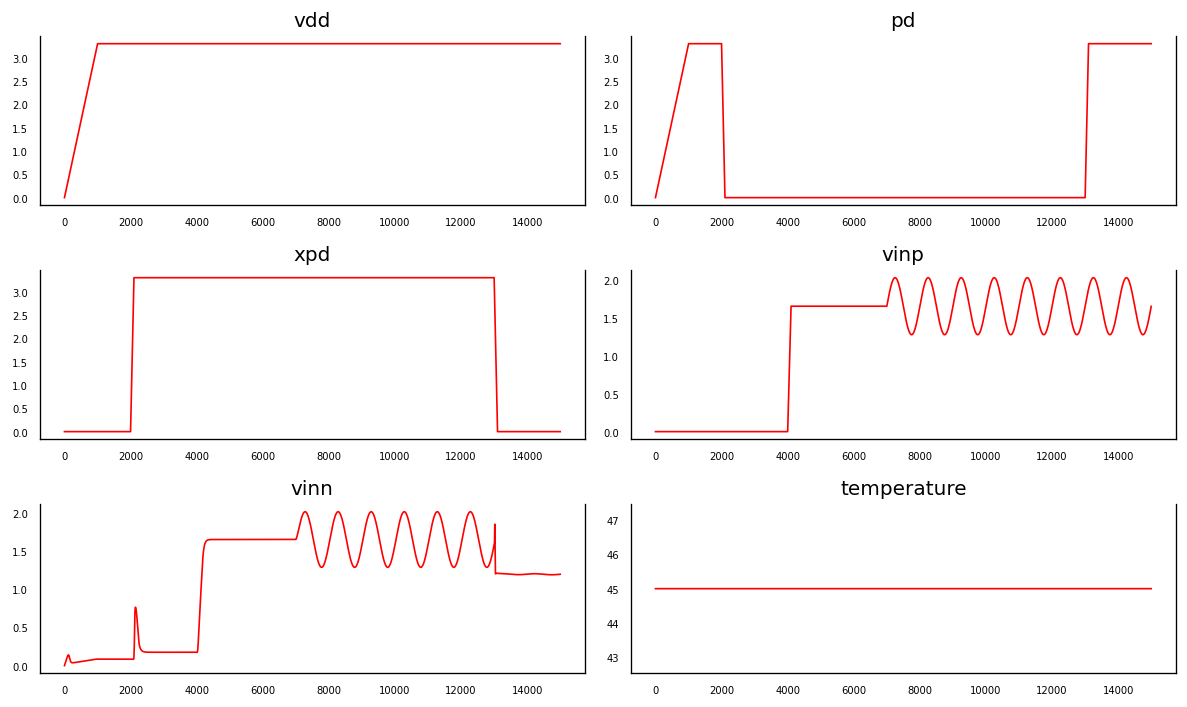

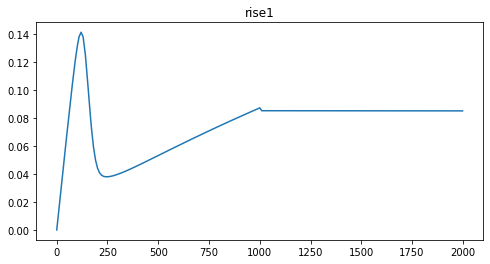

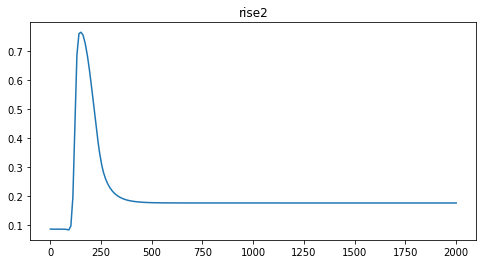

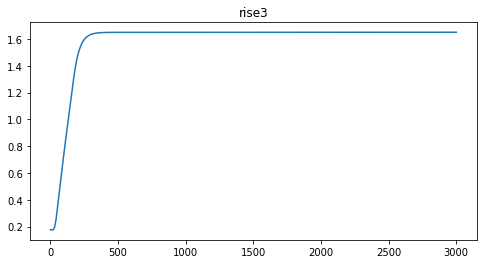

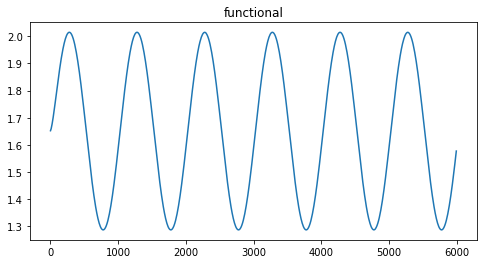

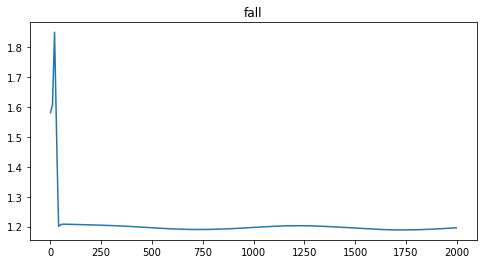

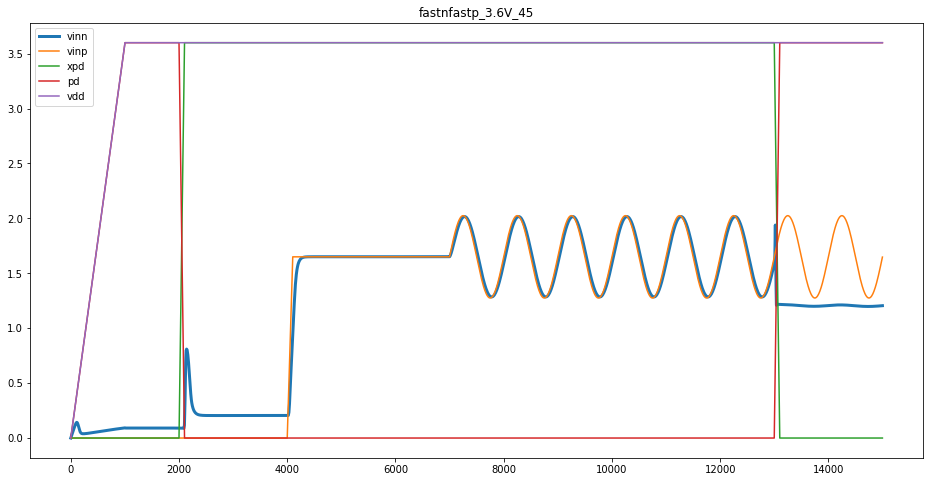

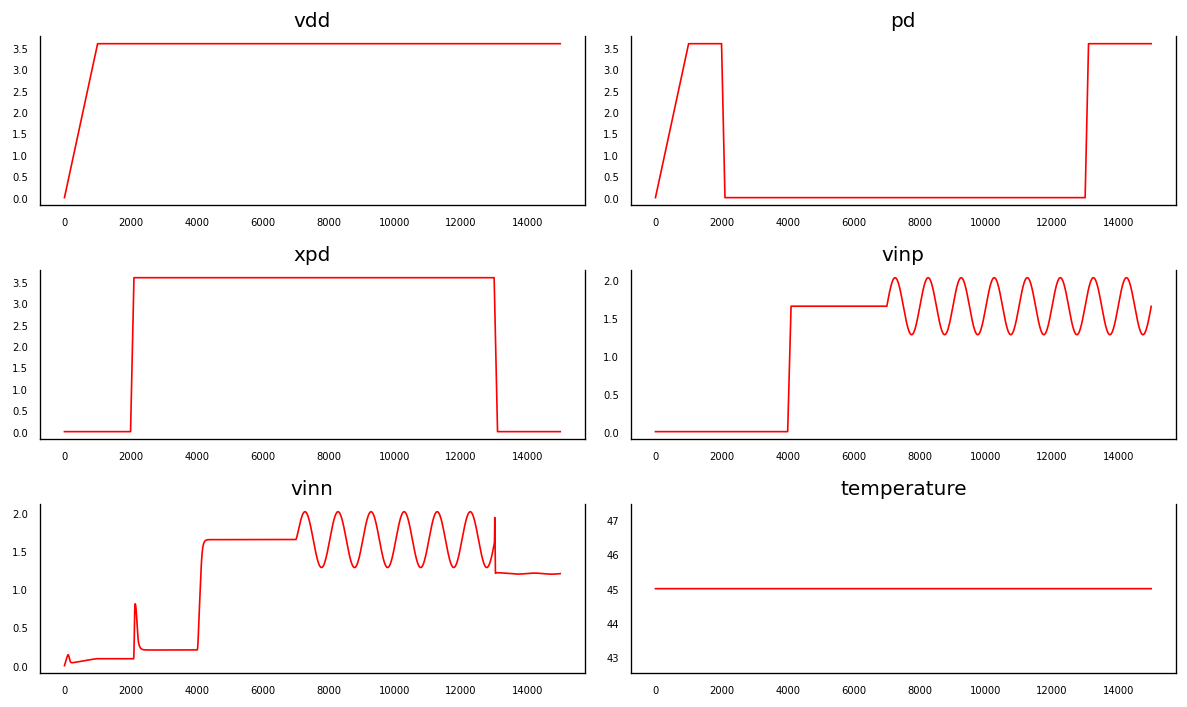

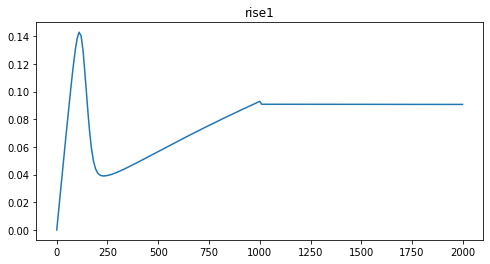

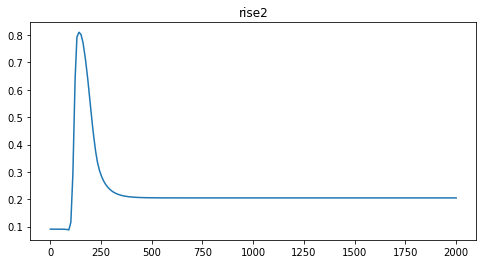

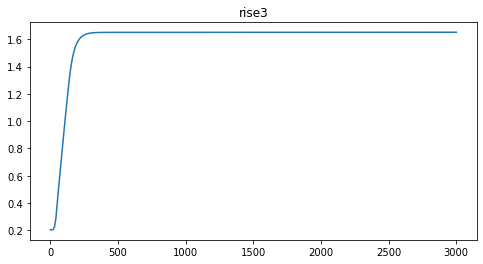

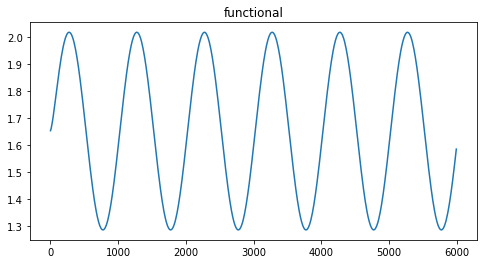

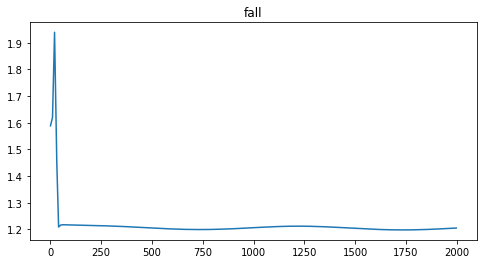

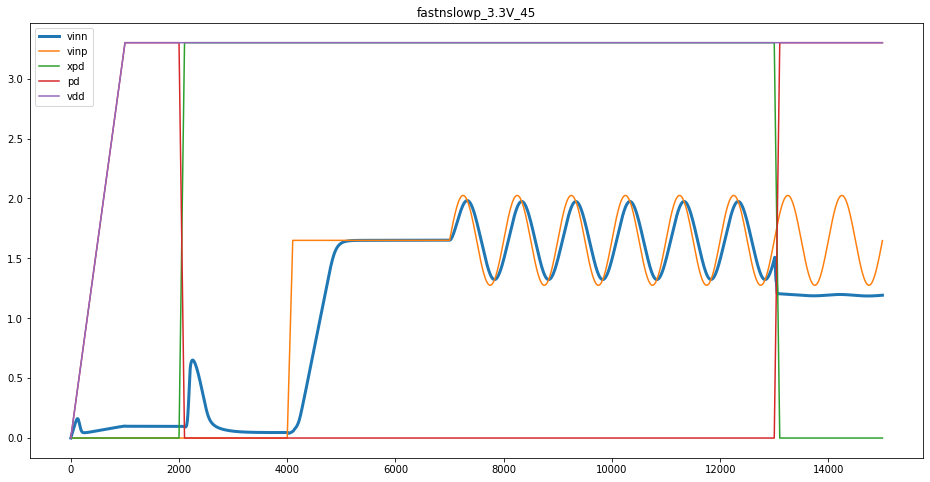

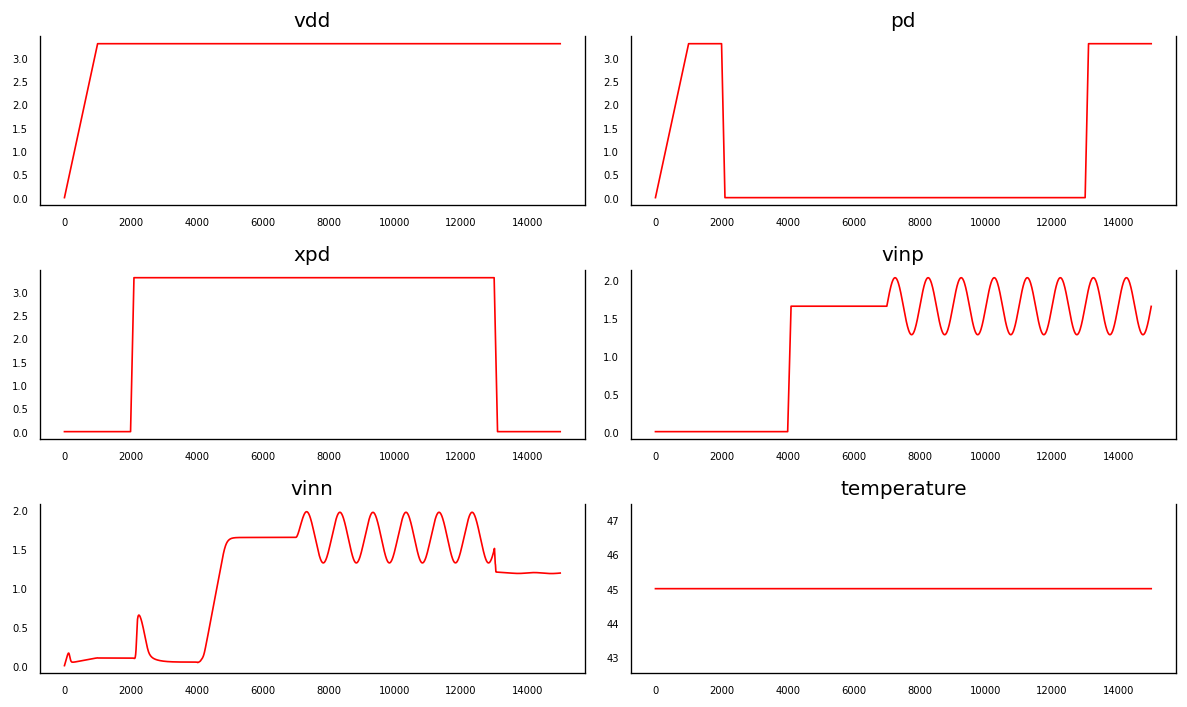

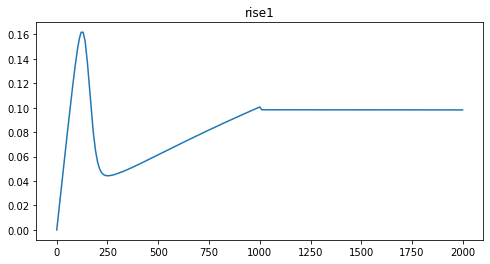

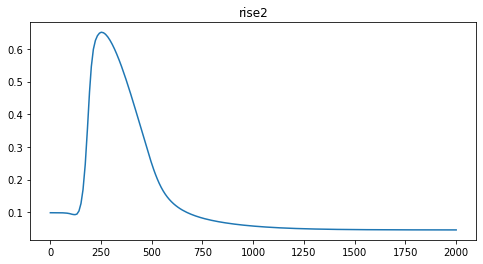

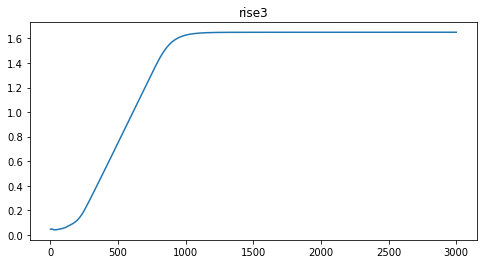

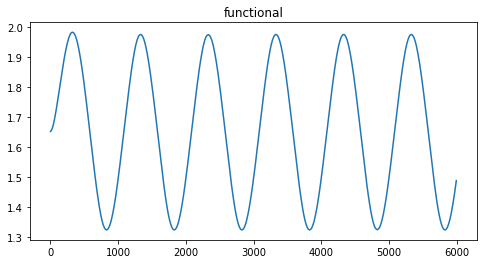

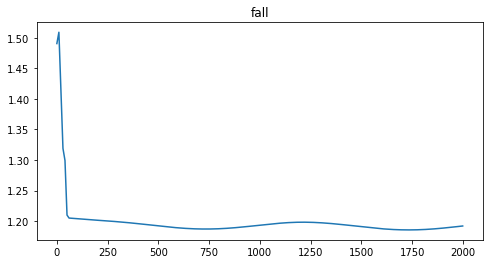

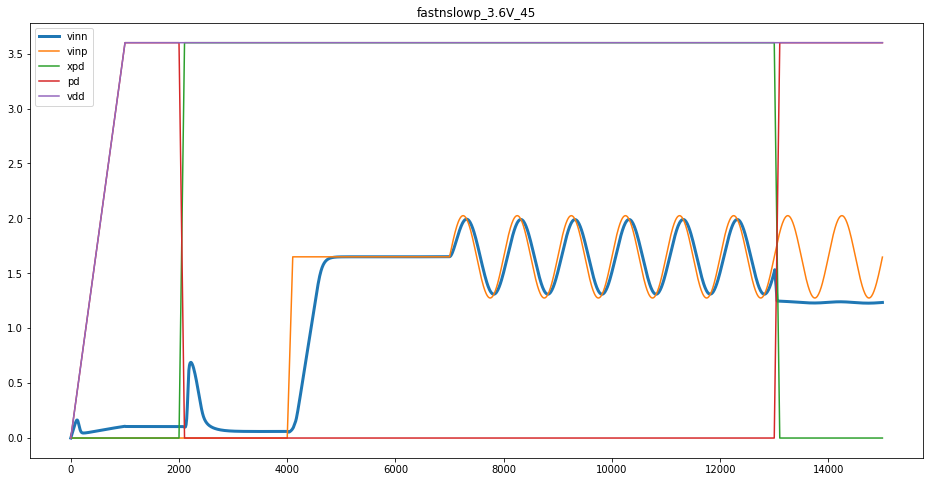

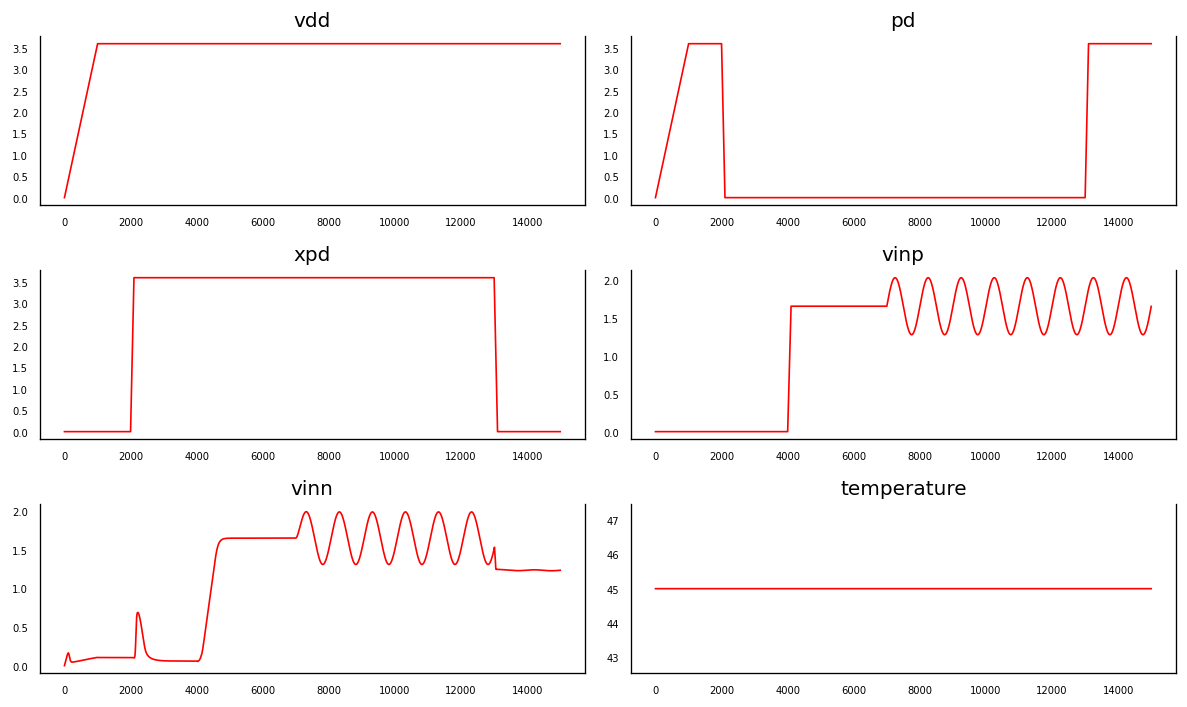

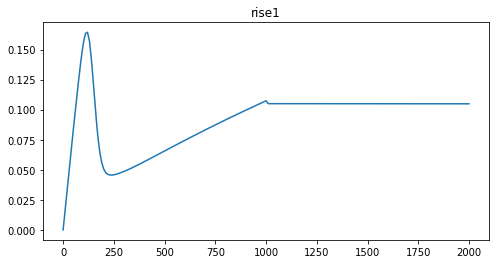

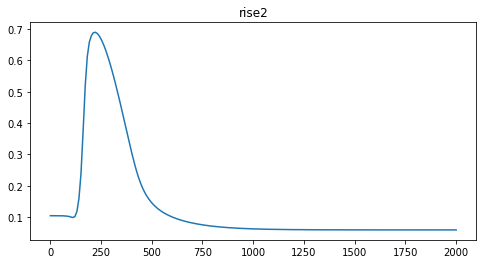

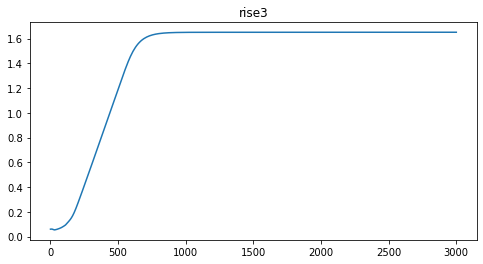

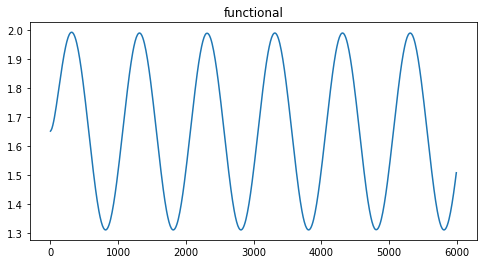

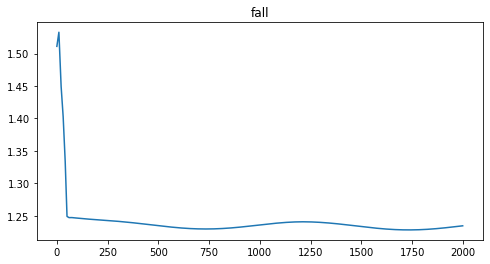

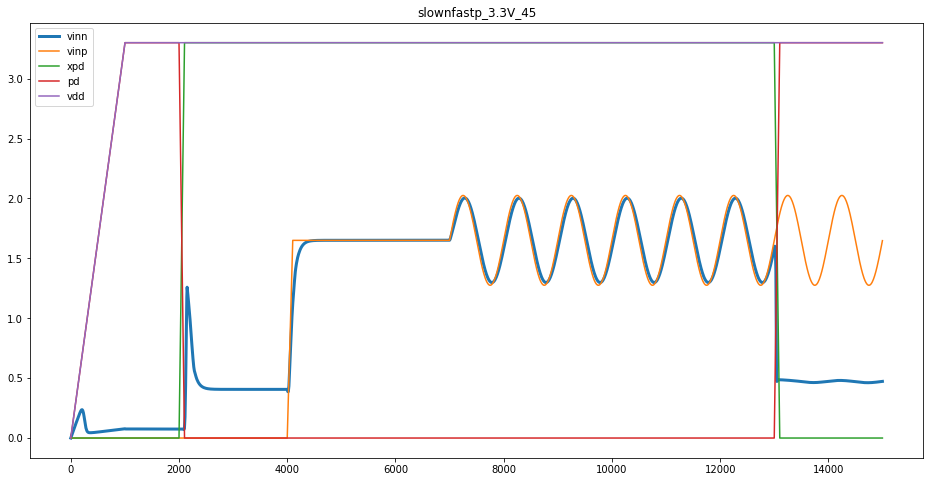

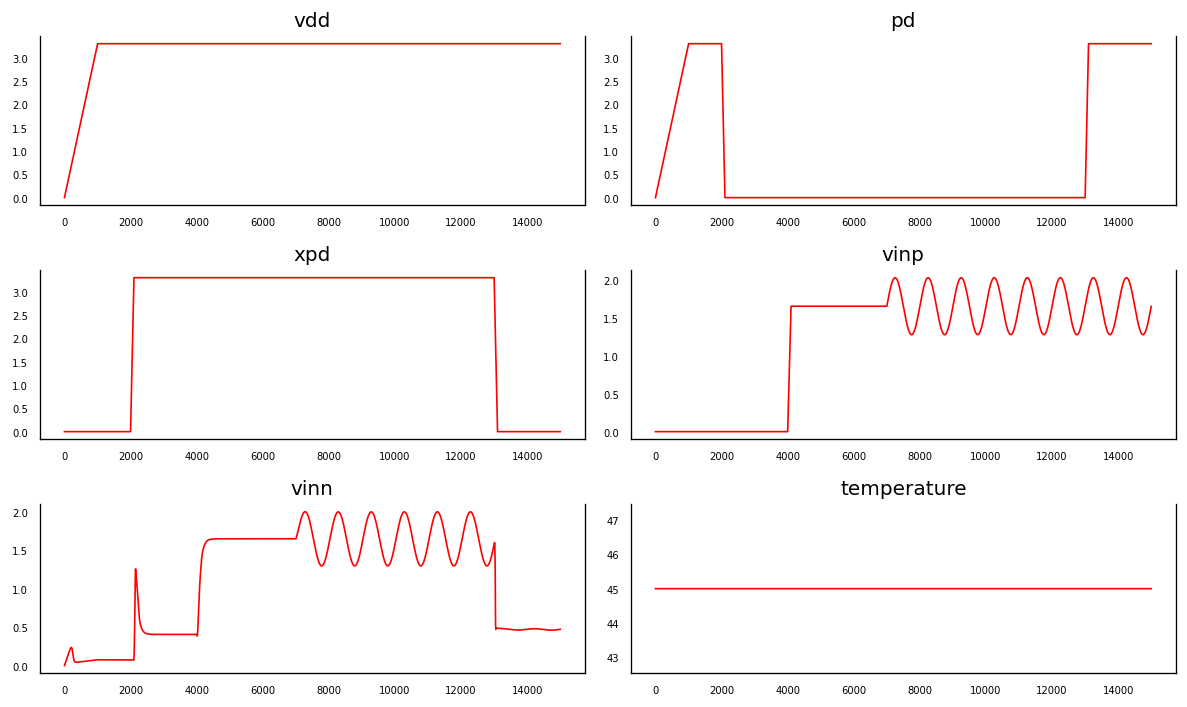

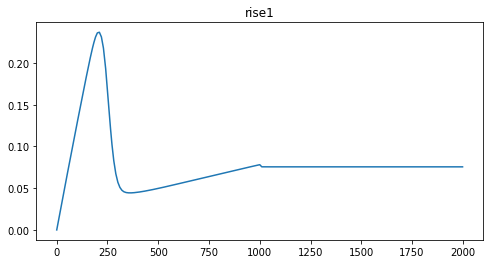

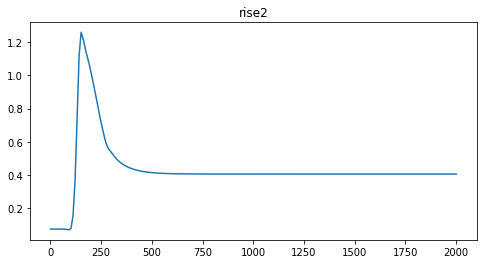

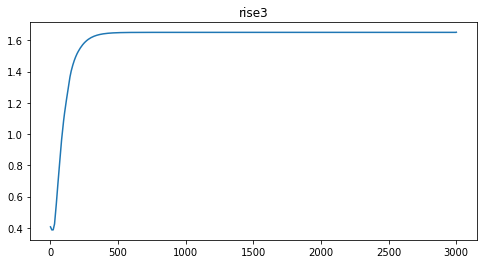

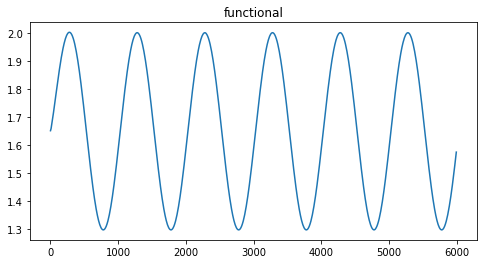

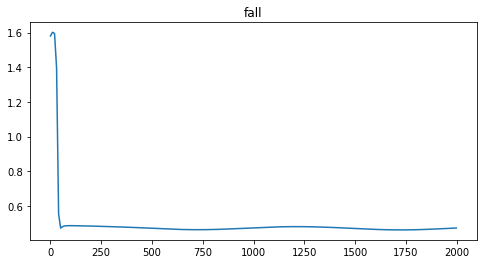

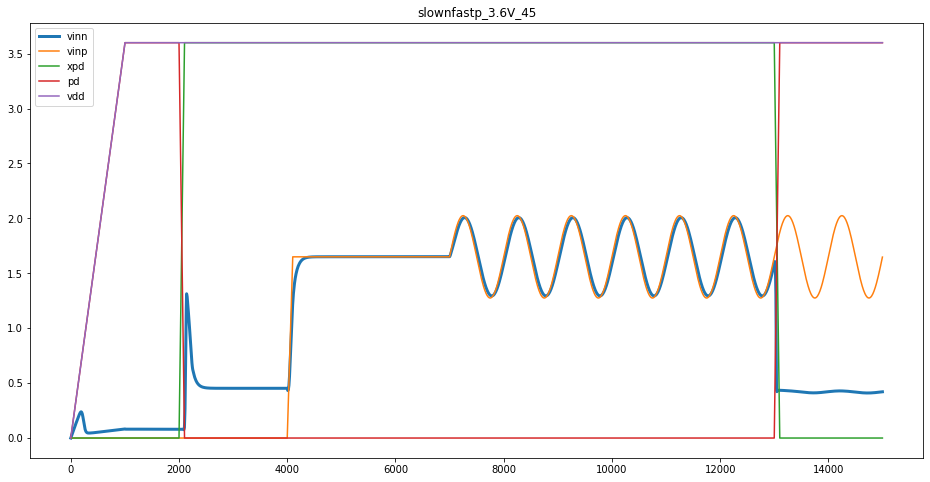

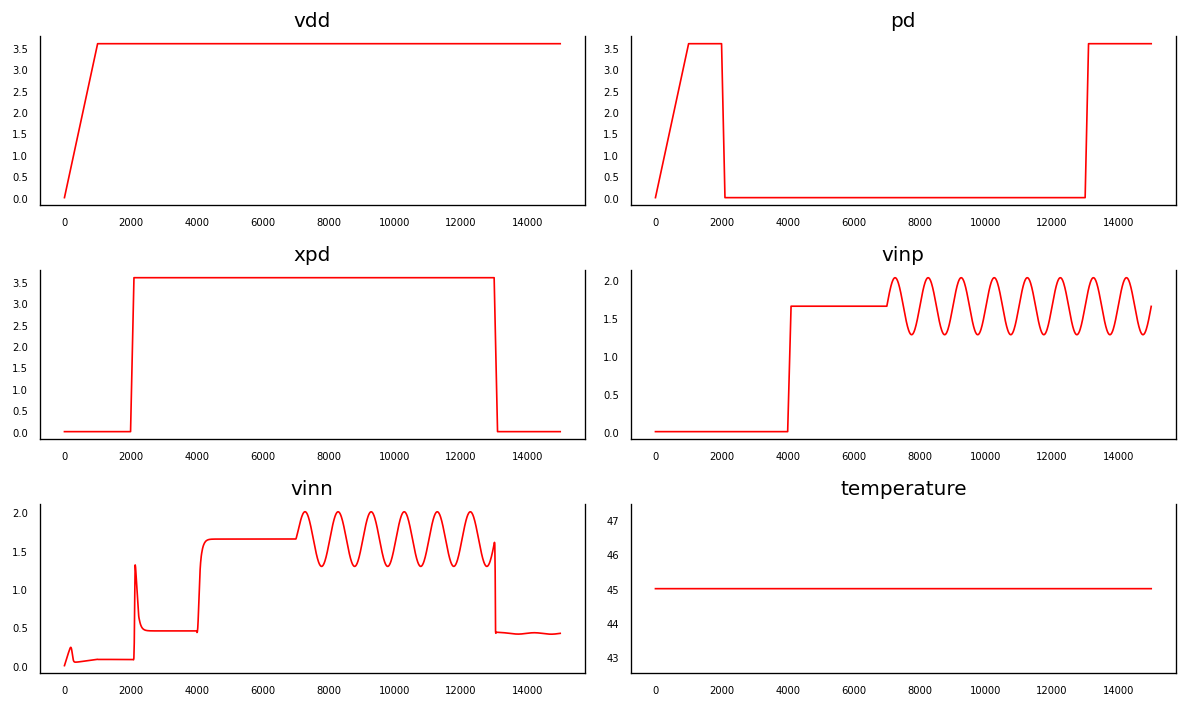

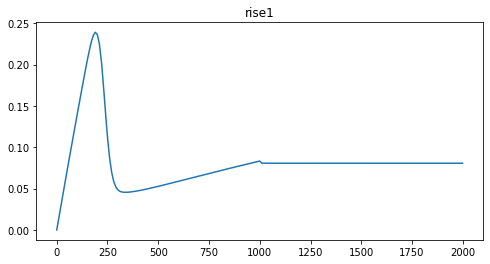

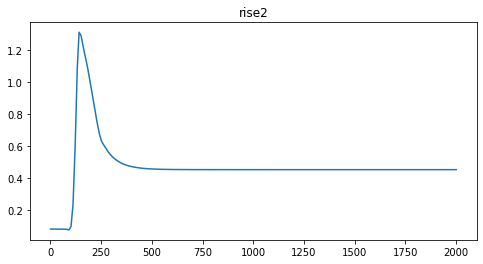

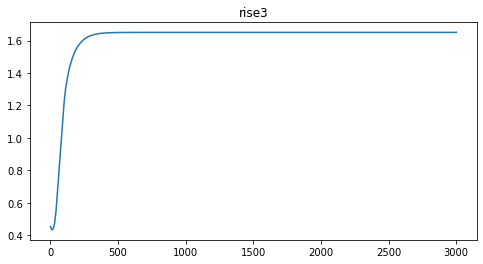

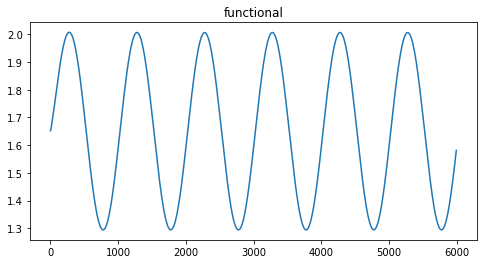

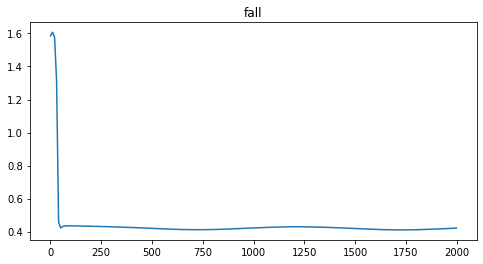

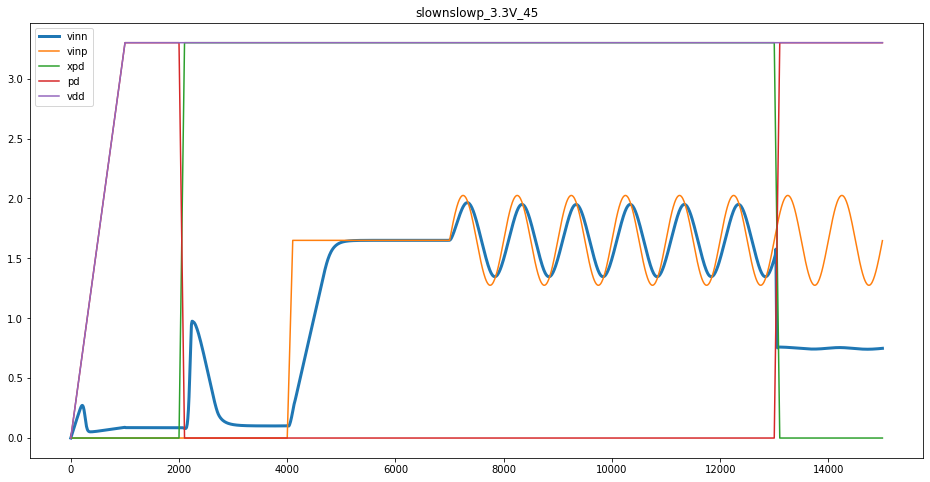

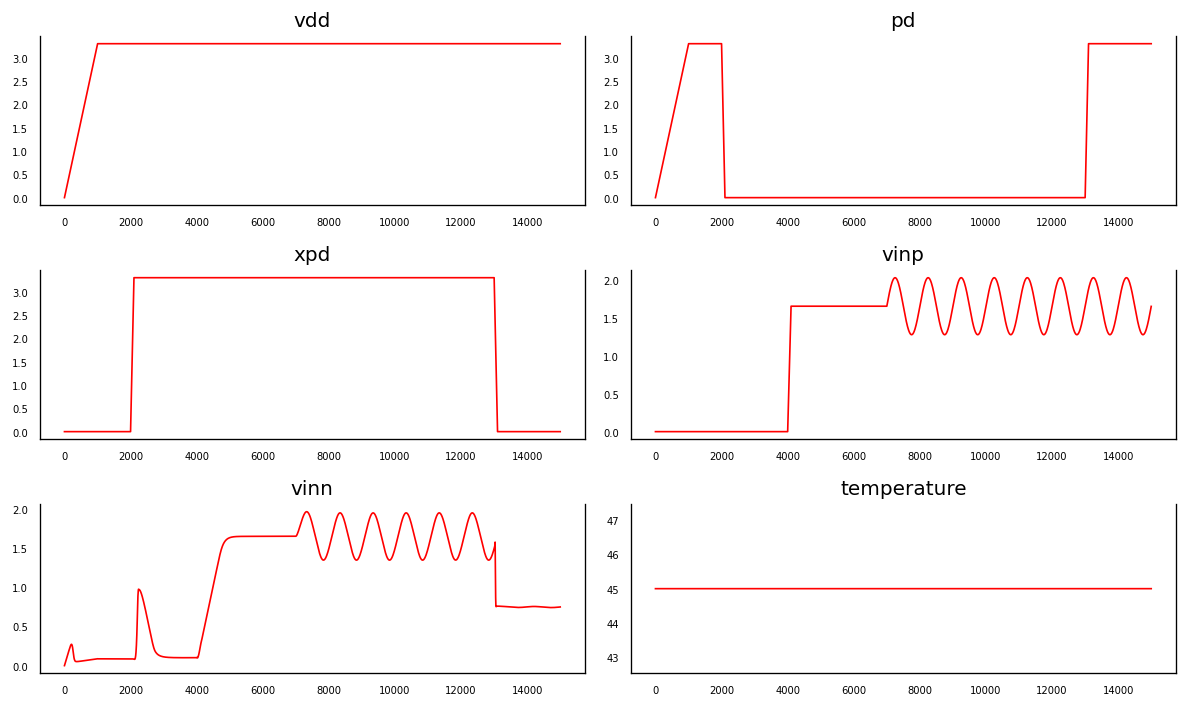

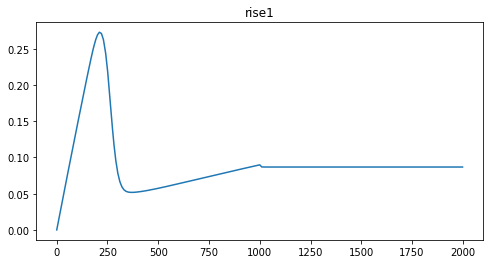

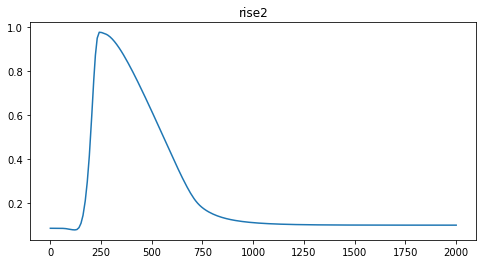

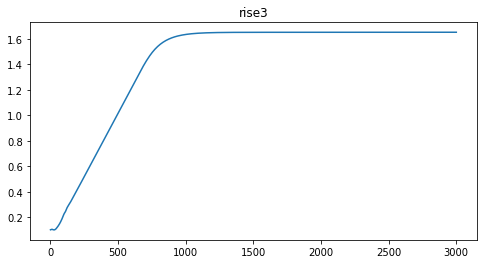

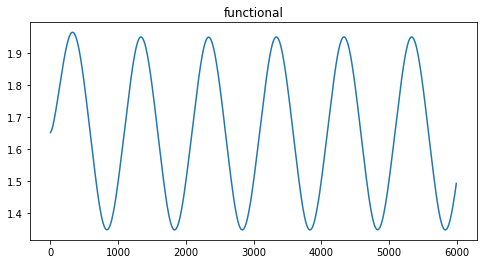

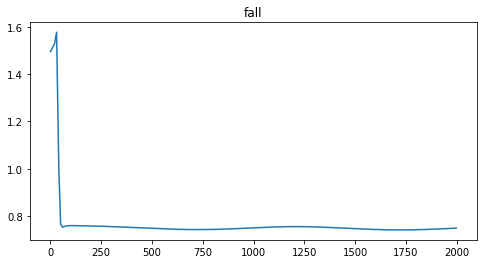

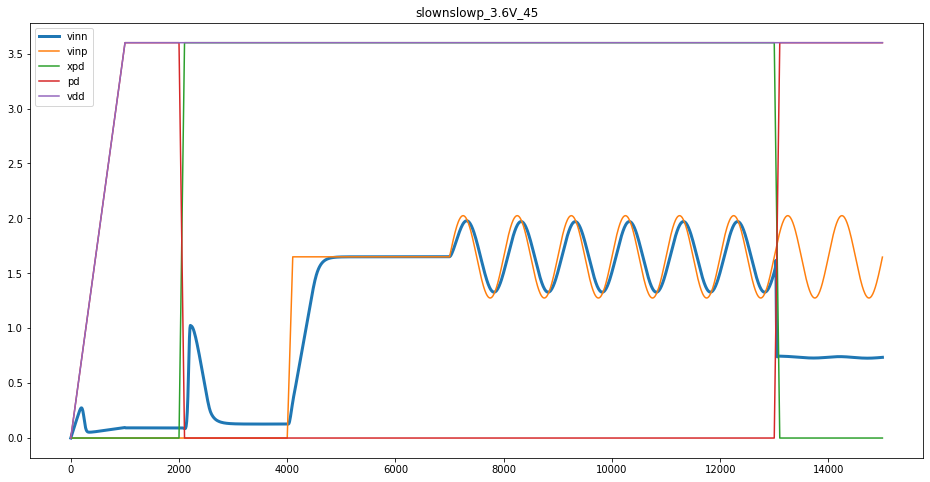

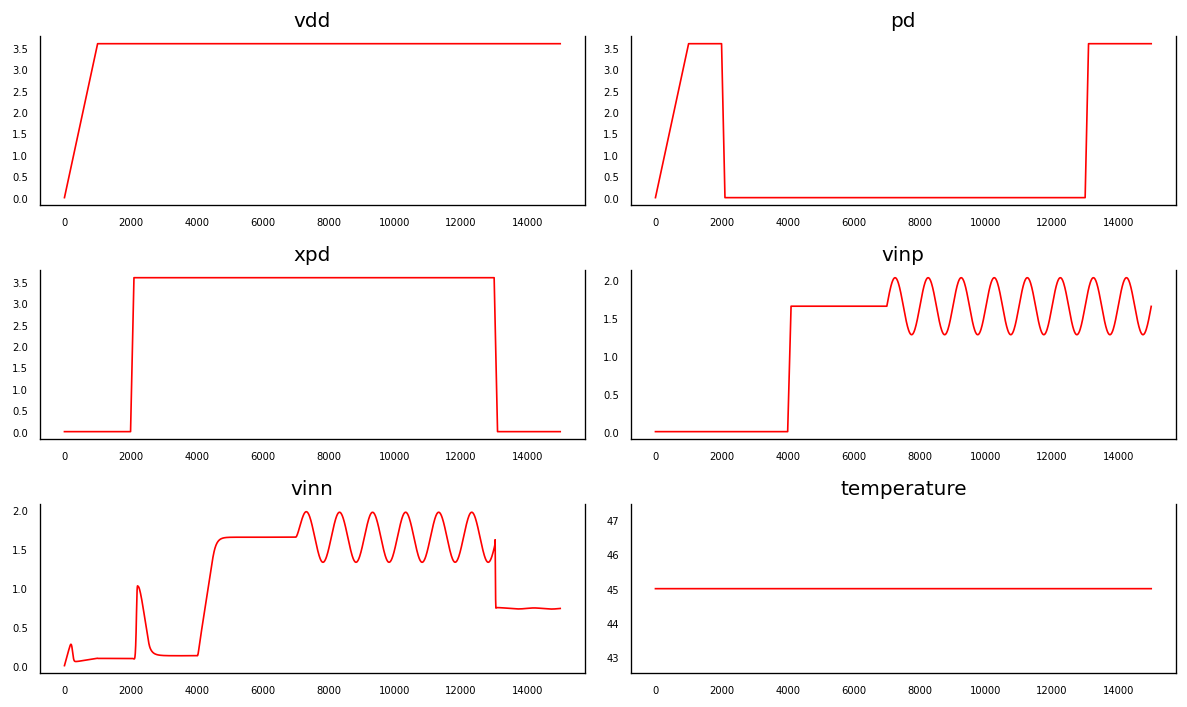

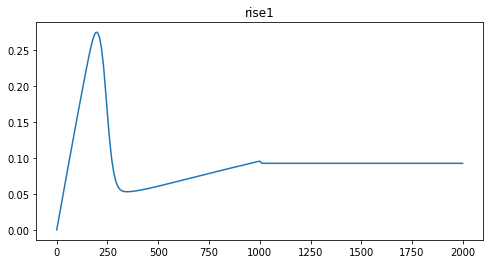

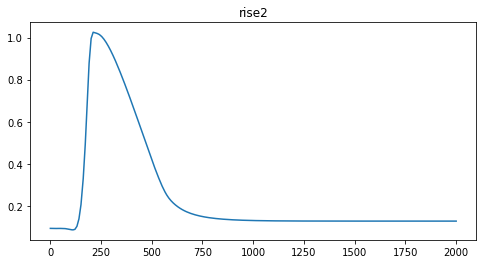

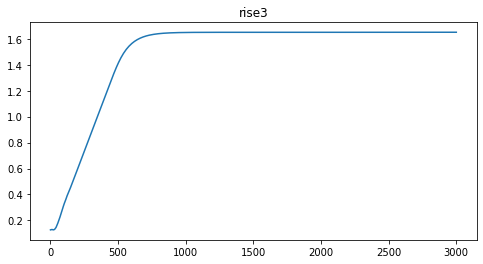

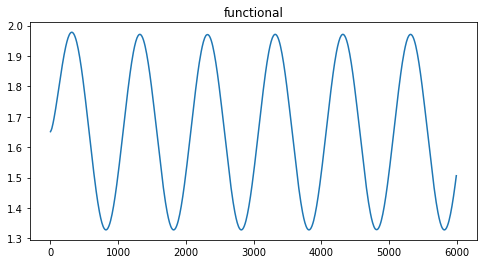

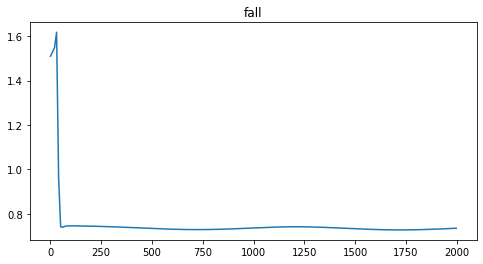

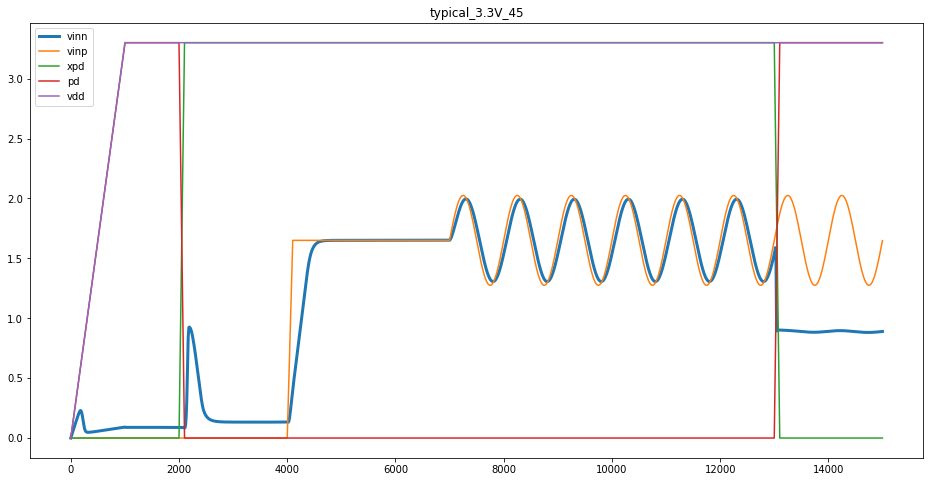

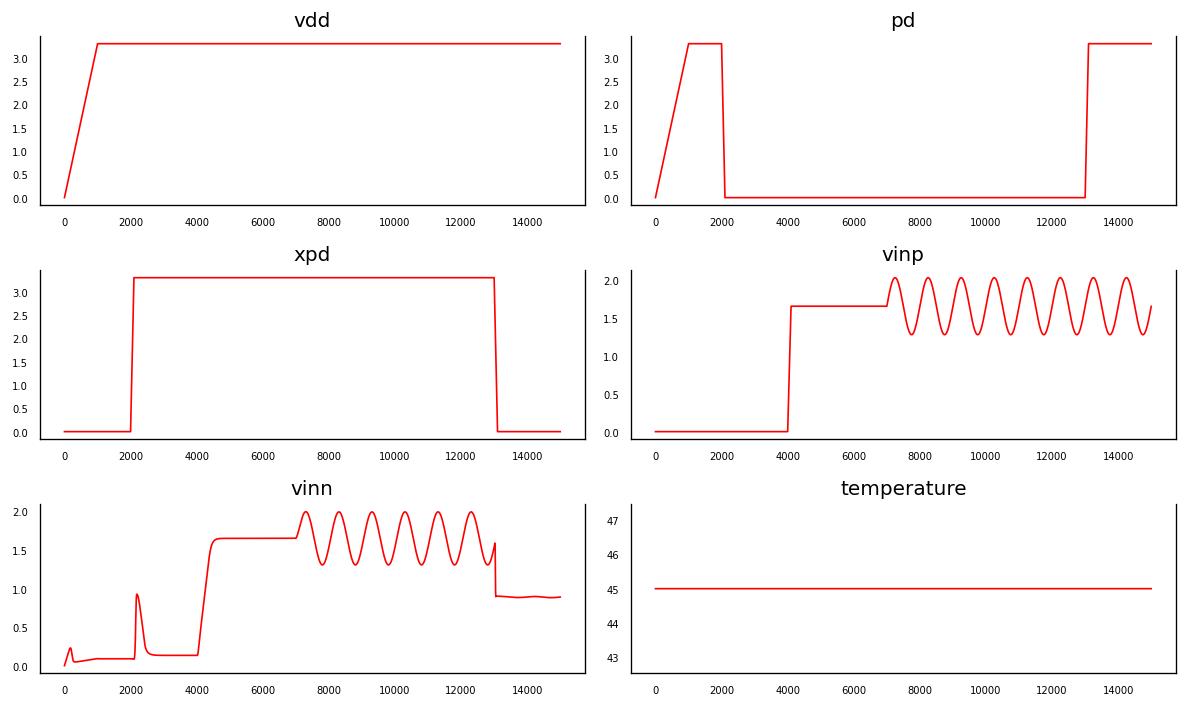

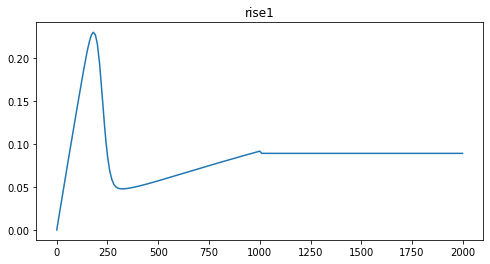

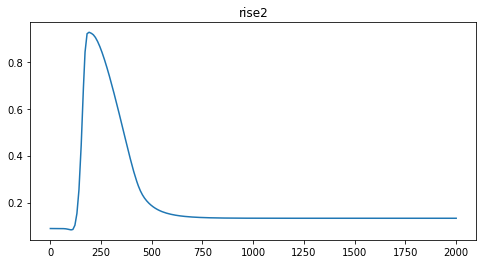

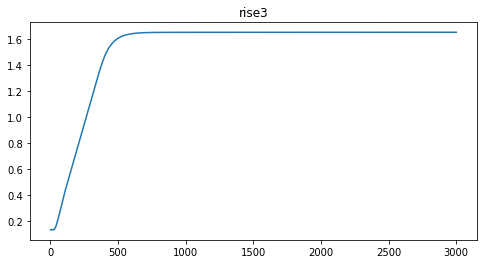

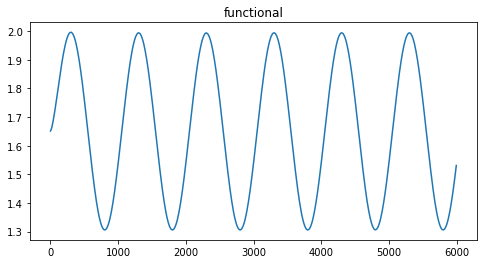

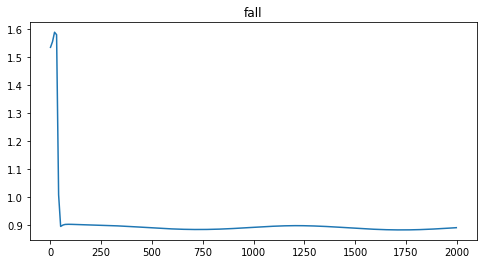

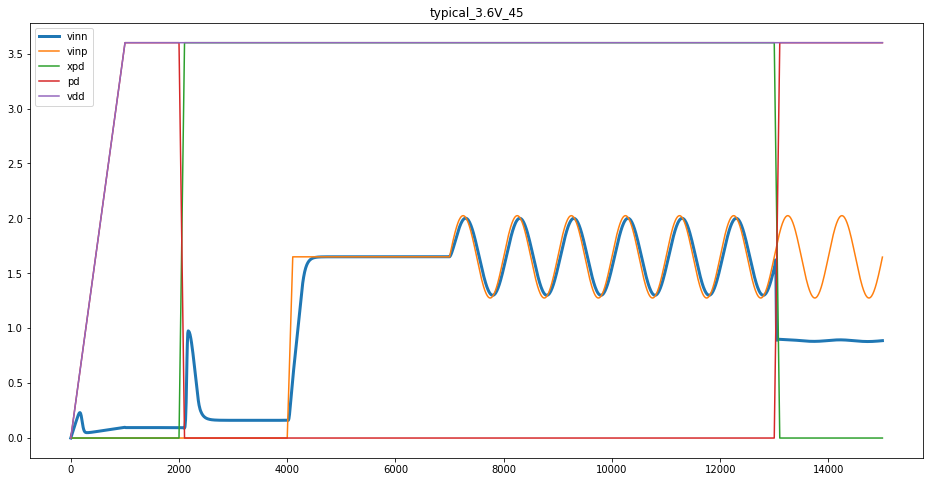

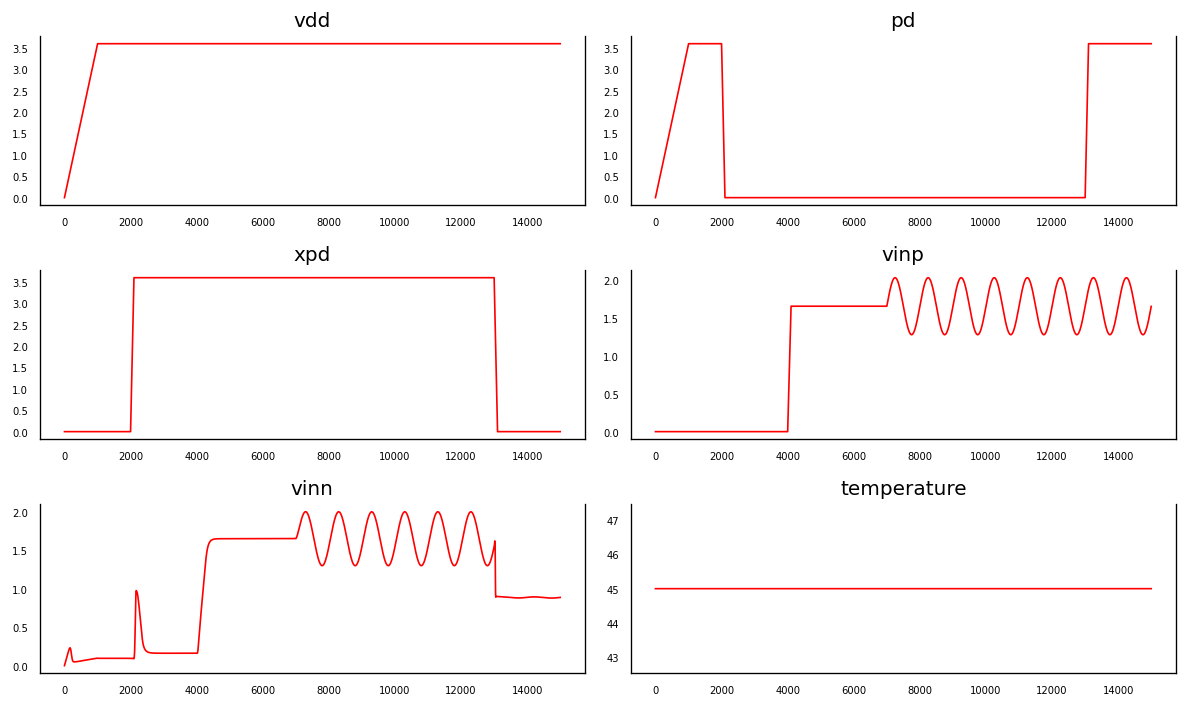

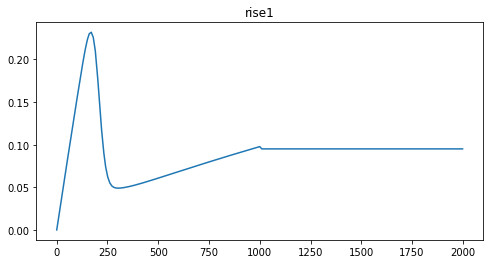

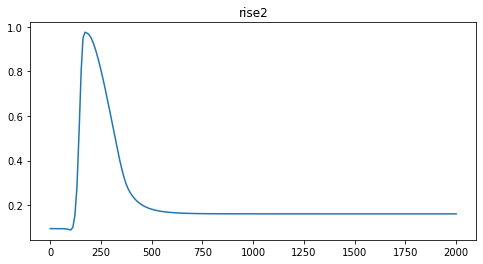

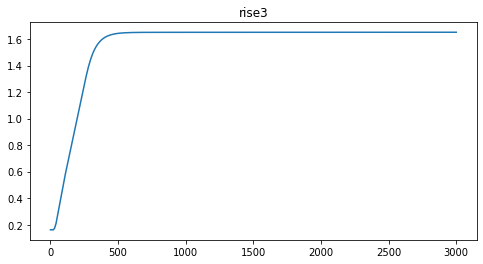

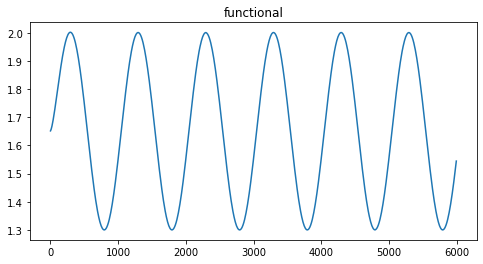

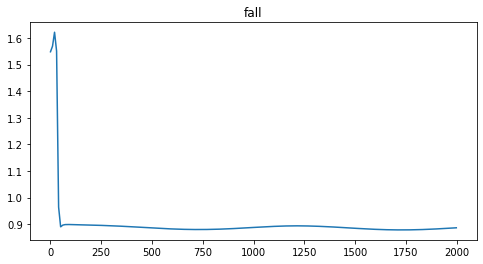

In [24]:
path = "D:\\Final Year Project\\Play with DWT\\Sine\\dataset\\sine 750 mv\\test\*.csv"
lpath = len(path)-5

for file in glob.glob(path):
    name = file[lpath:]
    name = name[:-8]
    
    file_folder = 'D:\\Final Year Project\\Split Defect\\waveforms\\' + name
    if not os.path.exists(file_folder):
        os.makedirs(file_folder)
        
    draw_full_waveform(file, file_folder)
    draw_full_path(file, file_folder)
    draw_each_regions(file, file_folder)